In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Library and extern Repositories

In [2]:
import sys
import os

library_paths = ['.']


for p in library_paths:
    if p not in sys.path:
        sys.path.append(p)

print(sys.path)

['/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython', '.']


# Scrap Pinterest Images

In [ ]:
!pip install pinscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pinscrape import pinscrape

In [ ]:
details = pinscrape.scraper.scrape("realistic anime male", "/content/drive/MyDrive/data/_kathi/face-reco/unknown2/", {}, 10)

if details["isDownloaded"]:
    print("\nDownloading completed !!")
    print(f"\nTotal urls found: {len(details['extracted_urls'])}")
    print(f"\nTotal images downloaded (including duplicate images): {len(details['url_list'])}")
    print(details)
else:
    print("\nNothing to download !!")



Total urls found: 9

Total images downloaded (including duplicate images): 194
{'isDownloaded': True, 'url_list': ['https://i.pinimg.com/originals/90/ec/09/90ec09beae2a7bca5a7a2d0ae3552804.png', 'https://i.pinimg.com/originals/70/cf/56/70cf561500d45b73d6ee8b45505c2f79.jpg', 'https://i.pinimg.com/originals/42/0a/3d/420a3d1ed2f9de41d4044923e8c6c647.jpg', 'https://i.pinimg.com/originals/e6/dc/59/e6dc59e2238207ef499c09c7a29fac46.jpg', 'https://i.pinimg.com/originals/4d/e6/14/4de614b154644eee45025a16e9f86135.jpg', 'https://i.pinimg.com/originals/a5/5d/d3/a55dd37ff661e8b181312ee889fc780a.jpg', 'https://i.pinimg.com/originals/62/88/c5/6288c5d0ac2a18e2b01ee42ceca5c7f7.jpg', 'https://i.pinimg.com/originals/4c/97/ce/4c97ce5951f034d5d35f1ade75071536.jpg', 'https://i.pinimg.com/originals/83/d6/46/83d646f96b7a6febefe4fff2fdc0586b.jpg', 'https://i.pinimg.com/originals/50/9f/be/509fbe4bd2709ed864b1dc867ebe72ad.jpg', 'https://i.pinimg.com/originals/26/8e/4b/268e4bb8caaa3dd30dd3a717c0b25454.jpg', 'ht

# Crop Image with Face Detection

In [3]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=4b2f15efc6788f348705f71852c233379e9ce08b810c1efa21017b5f2b313816
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition
import cv2
import matplotlib.pyplot as plt

In [ ]:
folder = '/content/drive/MyDrive/data/_kathi/face-reco/unknown/'

for filename in os.listdir(folder):
  path = os.path.join(folder, filename)
  img = cv2.imread(path)
  if img is not None:
    try:
      face_locations = face_recognition.face_locations(img)
      face_img = img.copy()
      

      cropped = []
      for top, right, bottom, left in face_locations:
        offset = int((bottom-top)*0.1)
        top -= int(offset*3)
        bottom += offset
        left -= int(offset*2)
        right += int(offset*2)

        cv2.rectangle(face_img, (left, top), (right, bottom), (0,255,0), 2)
        cropped = img[top:bottom, left:right]

        cv2.imwrite(f'/content/drive/MyDrive/data/_kathi/face-reco/ghibli/{filename}', cropped)
        os.remove(path)
        print('success: ', filename)
    except:
      print('failed: ', filename)


#plt.axis('off')
#plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
#plt.show()

success:  e92fc5e8319dbc6d5c61070a6d464ed9.jpg
success:  05801b49da95de76079c564643da914b.jpg
success:  7fa56f87166cbe92aaeb01f906a673eb.jpg
success:  447ea69f8743e8aa971579c07b31c962.jpg
success:  22d7475ab692720b75457f7b23d2f812.jpg
success:  9d32d355dcee1e8b2d024042b5c4a7c4.jpg
success:  1fe931f8583c3859c86d530460faac3c.jpg


#Crop from Video

In [4]:
import cv2
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

%matplotlib inline


In [14]:
p = '/content/drive/MyDrive/repos/art-style-challenge/extern/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(p)

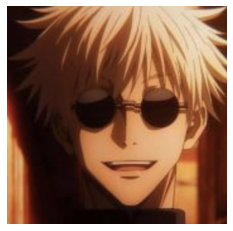

[[120 130 363 363]]


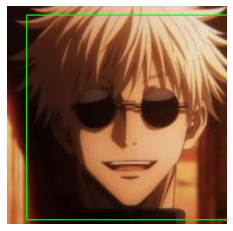

In [20]:
face_img = cv2.imread('/content/drive/MyDrive/data/_kathi/ghibli/Starlight_Sophie.jpg')
face_img = cv2.imread('/content/drive/MyDrive/repos/art-style-challenge/data/faces2/4.png')
plt.axis('off')
plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
plt.show()
faces = faceCascade.detectMultiScale(face_img)
print(faces)

for left, top, w, h in faces:
  # add offset for better cropping
  bottom = top+h
  right = left+w

  offset = int((bottom-top)*0.1)
  top -= int(offset*3)
  bottom += offset
  left -= int(offset*2)
  right += int(offset*2)

  # add rectangle to visualize
  cv2.rectangle(face_img, (left, top), (right, bottom), (0,255,0), 2)

  plt.axis('off')
  plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
  plt.show()

In [21]:
path = '/content/drive/MyDrive/repos/art-style-challenge/data/videos/stimme_des_herzens2.mov'
os.path.exists(path)

True

In [22]:
p = '/content/drive/MyDrive/repos/art-style-challenge/extern/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(p)

In [24]:
outdir = f'/content/drive/MyDrive/repos/art-style-challenge/data/faces2'
cap = cv2.VideoCapture(path)

count = 0
img_counter = 0

if (cap.isOpened() == False):
  print('upsi')

while cap.isOpened():
  ret, frame = cap.read()

  if not ret:
    break

  if count==0:
    try:
      face_img = frame.copy()

      # show current frame
      plt.axis('off')
      plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
      #plt.show()
      display.display(plt.gcf())
      display.clear_output(wait=True)

      face_locations = faceCascade.detectMultiScale(face_img)

      for left, top, w, h in face_locations:
        bottom = top+h
        right = left+w

        offset = int((bottom-top)*0.1)
        top -= int(offset*3)
        bottom += offset
        left -= int(offset*2)
        right += int(offset*2)

        # add rectangle to visualize
        cv2.rectangle(frame, (left, top), (right, bottom), (0,255,0), 2)

      # crop and save
        cropped = face_img[top:bottom, left:right]
        cv2.imwrite(f'{outdir}/{img_counter}.jpg', cropped)
        img_counter += 1

      # display results
      plt.axis('off')
      plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
      #plt.show()
      display.display(plt.gcf())
      display.clear_output(wait=True)

    except KeyboardInterrupt:
      break
    except:
      pass

    count = 60*2

  else:
    count -= 1
  
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

Error in callback <function flush_figures at 0x7f035e2b6050> (for post_execute):


KeyboardInterrupt: ignored